# Fundamentos de Inteligência Artificial - Trabalho Prático 2

## Problema - Coloração de Grafos: 

O problema de coloração em grafos em sua forma mais tradicional consiste na rotulação (atribuição de uma cor) de vértices de um grafo, os quais estão sujeitos a restrições previamente definidas. A restrição usualmente imposta é que dois vértices vizinhos, isto é, que compartilham uma mesma aresta, não podem possuir a mesma cor.

Neste notebook, uma instância desse problema é modelada como um grafo de restrições (Constraint Graph), onde as arestas representam as restrições binárias entre os vértices (variáveis do problema). Para construir este grafo, utilizaremos a mesma estrutura de dados (class Graph) que foi fornecida no Estudo Dirigido 1 sobre Busca em Grafos.

In [ ]:
class Edge:
    def __init__(self, u, v, w):
        self.u = u  # starting vertex
        self.v = v  # ending vertex
        self.w = w  # weight of the edge

    def __lt__(self, other):
        # This makes the edges comparable by weight for sorting
        return self.w < other.w

    def __str__(self):
        # String representation of an edge
        return f"{self.u} -> {self.v} ({self.w})"

    def __repr__(self):
        return self.__str__()

class Graph:
    def __init__(self):
        # Initialize a graph with no predefined number of vertices
        self.graph = {}  # key: vertex, value: list of edges

    def add_edge(self, u, v, w):
        # Add an edge from u to v with weight w
        if u not in self.graph:
            self.graph[u] = []
        if v not in self.graph:
            self.graph[v] = []

        self.graph[u].append(Edge(u, v, w))

    def add_undirected_edge(self, u, v, w):
        # Add an undirected edge between u and v with weight w
        self.add_edge(u, v, w)
        self.add_edge(v, u, w)

    def __str__(self):
        # String representation of the entire graph
        result = []
        for u in self.graph:
            for edge in self.graph[u]:
                result.append(str(edge))
        return "\n".join(result)

    def get_edges(self):
        # Returns all edges in the graph
        edges = []
        for u in self.graph:
            for edge in self.graph[u]:
                edges.append(edge)
        return edges

    def out_degree(self, u):
        # Return the out-degree of vertex u
        if u in self.graph:
            return len(self.graph[u])
        else:
            raise ValueError(f"Vertex {u} not found in the graph.")

    def in_degree(self, v):
        # Return the in-degree of vertex v
        in_deg = 0
        for u in self.graph:
            for edge in self.graph[u]:
                if edge.v == v:
                    in_deg += 1
        return in_deg

    def get_neighbors(self, u):
        # Returns the neighbors of vertex u
        if u in self.graph:
            return [edge.v for edge in self.graph[u]]
        else:
            raise ValueError(f"Vertex {u} not found in the graph.")

### Instância do Problema de Coloração em Grafos: 

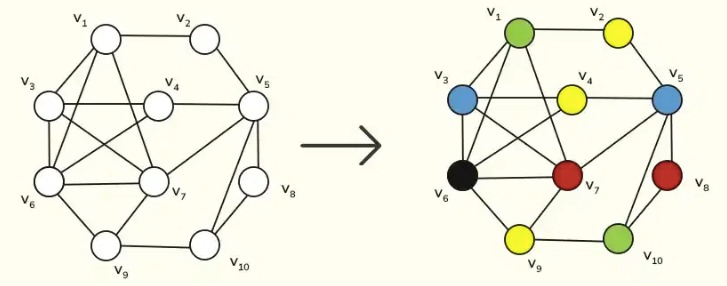

In [ ]:
Example = Graph()

Example.add_undirected_edge("V1", "V2", 1)
Example.add_undirected_edge("V1", "V3", 1)
Example.add_undirected_edge("V1", "V6", 1)
Example.add_undirected_edge("V1", "V7", 1)
Example.add_undirected_edge("V2", "V5", 1)
Example.add_undirected_edge("V3", "V4", 1)
Example.add_undirected_edge("V3", "V6", 1)
Example.add_undirected_edge("V3", "V7", 1)
Example.add_undirected_edge("V4", "V5", 1)
Example.add_undirected_edge("V4", "V6", 1)
Example.add_undirected_edge("V5", "V7", 1)
Example.add_undirected_edge("V5", "V8", 1)
Example.add_undirected_edge("V5", "V10", 1)
Example.add_undirected_edge("V6", "V7", 1)
Example.add_undirected_edge("V6", "V9", 1)
Example.add_undirected_edge("V8", "V10", 1)
Example.add_undirected_edge("V9", "V10", 1)

In [ ]:
print(Example)

***
### Implementação da Função contar_conflitos(grafo, coloracao). 

#### Entrada:

- o grafo (objeto da classe Graph)

- um dicionário coloracao, onde coloracao[vértice] = cor atribuída

#### Saída:

- número total de conflitos (arestas entre vértices de mesma cor)

In [ ]:
def contar_conflitos(grafo, coloracao):
    conflitos = 0
    visitados = set()

    for u in grafo.graph:
        for vizinho in grafo.get_neighbors(u):
            if (u, vizinho) not in visitados and (vizinho, u) not in visitados:
                if coloracao[u] == coloracao[vizinho]:
                    conflitos += 1
                visitados.add((u, vizinho))
                visitados.add((vizinho, u))

    return conflitos

#### Explicação rápida:

- Percorremos todas as arestas do grafo.

- Para cada par (u, vizinho), verificamos se já contamos esse par (usando o conjunto visitados).

- Se os dois vértices tiverem a mesma cor, incrementamos o contador de conflitos.

Essa função será útil para guiar as heurísticas de busca que implementaremos a seguir. Vamos agora testar se ela funciona, passando como argumento uma coloração, ou seja, uma atribuição de cores a cada vértice na forma de um dicionário:

In [ ]:
coloracao_exemplo = {
    "V1": "vermelho",
    "V2": "azul",
    "V3": "vermelho",
    "V4": "amarelo",
    "V5": "azul",
    "V6": "verde",
    "V7": "vermelho",
    "V8": "azul",
    "V9": "verde",
    "V10": "vermelho"
}

print("Conflitos:", contar_conflitos(Example, coloracao_exemplo))

***
### Implementação da Função que gera uma atribuição (coloração) aleatória. 
- serve para gerar uma atribuição inicial para o problema de coloração de grafos.
- Entrada: Grafo de restrições e lista de possíveis cores para seus vértices.
- Saída: dicionário -> key: vertice, value: cor


In [ ]:
import random

def gerar_coloracao_aleatoria(grafo, cores=["vermelho", "azul", "verde", "amarelo"]):
    coloracao = {}
    for vertice in grafo.graph.keys():
        coloracao[vertice] = random.choice(cores)
    return coloracao

In [ ]:
# Gerar uma coloração aleatória
coloracao_aleatoria = gerar_coloracao_aleatoria(Example)

# Mostrar a coloração gerada
print("Coloração Aleatória:")
for vertice, cor in coloracao_aleatoria.items():
    print(f"{vertice}: {cor}")

# Contar conflitos
num_conflitos = contar_conflitos(Example, coloracao_aleatoria)
print("\nNúmero de conflitos:", num_conflitos)

# Heurísticas

Nesta etapa, você deverá implementar algumas heurísticas de busca para resolver o problema de coloração.

***

### Implementação das Heurísticas:

#### Random Walk (RW)
- Escolhe aleatoriamente uma variável e muda sua cor aleatoriamente.
- Se melhorar (reduzir conflitos), aceita.
- Senão, também pode aceitar (não é obrigatório ser só melhoria, você pode definir uma probabilidade mais baixa para aceitar pioras).

#### Best Improvement (BI)
- Testa TODAS as mudanças possíveis (todos vértices e cores).
- Escolhe a mudança que mais reduz conflitos.

#### First Improvement com Any Conflict (FI with AC):
- Escolhe aleatoriamente uma variável que está em conflito.
- Tenta todas as cores possíveis para ela.
- Escolhe a cor que mais reduz conflitos (best color para aquela variável).

#### Simulated Annealing (SA)
- Parecido com FI, mas aceita piores soluções com uma probabilidade que diminui com o tempo (controle de temperatura).

#### Algoritmo Genético (GA):
- Evolui um conjunto de soluções candidatas, denominado população;
- A cada passo, as soluções atuais interagem entre si, através dos operadores de recombinação (crossover) e mutação (mutation) para produzir uma nova população. 

#### Random Walk (RW)

In [ ]:
def random_walk(grafo, coloracao_inicial, cores, max_iter=1000):
    coloracao = coloracao_inicial.copy()
    conflitos = contar_conflitos(grafo, coloracao)

    for _ in range(max_iter):
        vizinho = #gera uma nova solucao aleatoria
        novos_conflitos = contar_conflitos(grafo, vizinho)

        # complete o codigo


    return coloracao, conflitos

#### Best Improvement (BI)

In [ ]:
def best_improvement(grafo, coloracao_inicial, cores, max_iter=1000):
    coloracao = coloracao_inicial.copy()
    conflitos = contar_conflitos(grafo, coloracao)

    for _ in range(max_iter):
        # complete o codigo

    return coloracao, conflitos

#### First Improvement with Any Conflict (FI with AC)

In [ ]:
def first_improvement_ac(grafo, coloracao_inicial, cores, max_iter=1000):
    coloracao = coloracao_inicial.copy()
    conflitos = contar_conflitos(grafo, coloracao)

    for _ in range(max_iter):
        # complete o codigo

    return coloracao, conflitos

#### Simulated Annealing (SA)

In [ ]:
import math

def simulated_annealing(grafo, coloracao_inicial, cores, max_iter=1000, temperatura_inicial=1000, taxa_resfriamento=0.995):
    coloracao = coloracao_inicial.copy()
    conflitos = contar_conflitos(grafo, coloracao)
    temperatura = temperatura_inicial

    for _ in range(max_iter):
        # complete o codigo

    return coloracao, conflitos

#### Genetic Algorithm (GA)

In [ ]:
##### Funções Auxiliares para o GA

# Observação: Um indivíduo na população do GA é representado por uma coloração do grafo.
# dicionario coloracao[vértice] = cor atribuída

# Gera a população inicial de indivíduos com colorações aleatórias.
def criar_populacao_inicial(grafo, num_individuos, cores_disponiveis):
    
    # implemente a função
    
    # a populacao pode ser modelada como uma lista de colorações aleatórias
    return populacao

# Calcula o fitness de um indivíduo usando a função contar_conflitos(grafo, coloracao).  
def calcula_fitness(individuo, grafo):
    
    # implemente a função
    
    return fitness

#  Seleção com probabilidade proporcional a e^(-h(A)/temperatura).
#  O 'custo' h(A) é o número de conflitos.  
def selecao_com_annealing(populacao, temperatura):

    # implemente a função
    
    # retorna o indice do individuo selecionado
    return individuo_selecionado


# Faz o cruzamento de um ponto entre dois indivíduos (pai1 e pai2).
def crossover(pai1, pai2):
    
    # Seleciona um ponto de corte aleatório.
    # complete o codigo
    
    # Combina as partes dos pais para criar dois filhos.
    # complete o codigo
    
    return filho1, filho2

# Escolhe aleatoriamente um vértice do indivíduo e muda sua cor aleatoriamente com probabilidade = taxa_mutacao.
def mutation(individuo, cores, taxa_mutacao):
    
    # implemente a função 
    

In [ ]:
import random
import math


def algoritmo_genetico(grafo, num_individuos, num_geracoes, cores, taxa_mutacao, temperatura_inicial, taxa_resfriamento):
    
    populacao = criar_populacao_inicial(grafo, num_individuos, cores) # cria populacao inicial
    
    temperatura = temperatura_inicial 

    for geracao in range(num_geracoes): # repeat until termination
        
        # Avalia a população
        for individuo in populacao:
            avaliar_fitness(individuo, grafo)
        
        # get o melhor_individuo e seu fitness
        melhor_individuo = # complete o codigo
        melhor_fitness = avaliar_fitness(melhor_individuo, grafo)
        
        print(f"Geração {geracao+1}: Melhor individuo = {melhor_individuo}: Melhor fitness = {melhor_fitness}")
        
        # if some A in Pop satisfies all constraints then return A
        if melhor_fitness == 0:
            print("\n✅ Solução ótima encontrada!")
            return melhor_individuo

        # Npop := {}
        nova_populacao = []
        
        # repeat k/2 times
        for _ in range(num_individuos // 2):
           # complete o codigo
        
        # Pop := Npop
        populacao = nova_populacao

        # T is updated according to S
        temperatura *= taxa_resfriamento
        
    
    return melhor_individuo, melhor_fitness

***
### Testando as heurísticas de Busca Local:

- Gera uma coloração inicial aleatória.

- Chama cada uma das heurísticas de busca local.

- Mostra o número de conflitos obtido para cada heurística.


In [ ]:
cores = ["vermelho", "azul", "verde", "amarelo"]
    
# Gerar uma coloração inicial aleatória
coloracao_inicial = gerar_coloracao_aleatoria(Example, cores)

print("Coloração inicial:")
for vertice, cor in coloracao_inicial.items():
    print(f"{vertice}: {cor}")

conflitos_iniciais = contar_conflitos(Example, coloracao_inicial)
print("\nConflitos iniciais:", conflitos_iniciais)


print("\n--- Aplicando heurísticas ---\n")

# define o número máximo de passos de execução para cada heurística de busca local
max_steps = 1000

# Random Walk
coloracao_rw, conflitos_rw = random_walk(Example, coloracao_inicial, cores, max_steps)
print("Random Walk (RW):")
print(f"Conflitos finais: {conflitos_rw}")
print(coloracao_rw)

# Best Improvement
coloracao_bi, conflitos_bi = best_improvement(Example, coloracao_inicial, cores, max_steps)
print("\nBest Improvement (BI):")
print(f"Conflitos finais: {conflitos_bi}")
print(coloracao_bi)


# First Improvement - Any Conflict
coloracao_fi_ac, conflitos_fi_ac = first_improvement_ac(Example, coloracao_inicial, cores, max_steps)
print("\nFirst Improvement - Any Conflict (FI-AC):")
print(f"Conflitos finais: {conflitos_fi_ac}")
print(coloracao_fi_ac)

# Simulated Annealing

# define parametros do simulated annealing:
t_0 = 10 # temperatura inicial
alpha = 0.9 # taxa de resfriamento

coloracao_sa, conflitos_sa = simulated_annealing(Example, coloracao_inicial, cores, max_steps, temperatura_inicial=t_0, taxa_resfriamento=alpha)
print("\nSimulated Annealing (SA):")
print(f"Conflitos finais: {conflitos_sa}")
print(coloracao_sa)

***
### Testando o algoritmo genético:


In [ ]:
# Parâmetros
NUM_INDIVIDUOS = 100
NUM_GERACOES = 500
CORES = ["vermelho", "azul", "verde", "amarelo"]
TAXA_MUTACAO = 0.05
TEMPERATURA_INICIAL = 10
TAXA_RESFRIAMENTO = 0.9

# Execução
print("--- Executando o Algoritmo Genético ---")
coloracao_ga, conflitos_ga = algoritmo_genetico(Example, NUM_INDIVIDUOS, NUM_GERACOES, CORES, TAXA_MUTACAO, TEMPERATURA_INICIAL, TAXA_RESFRIAMENTO)

# Impressão do resultado
print("\n Algoritmo Genético (GA):")
print(f"Conflitos finais: {conflitos_ga}")
print(coloracao_ga)